No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


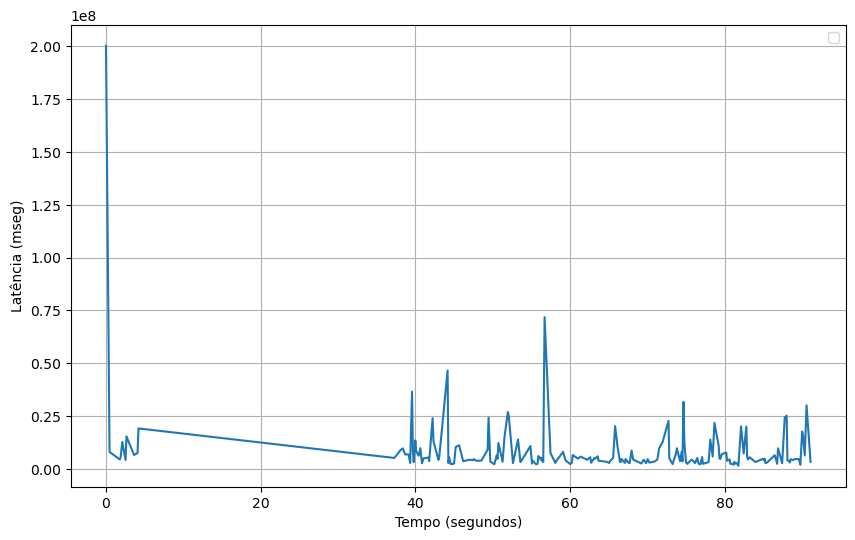

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


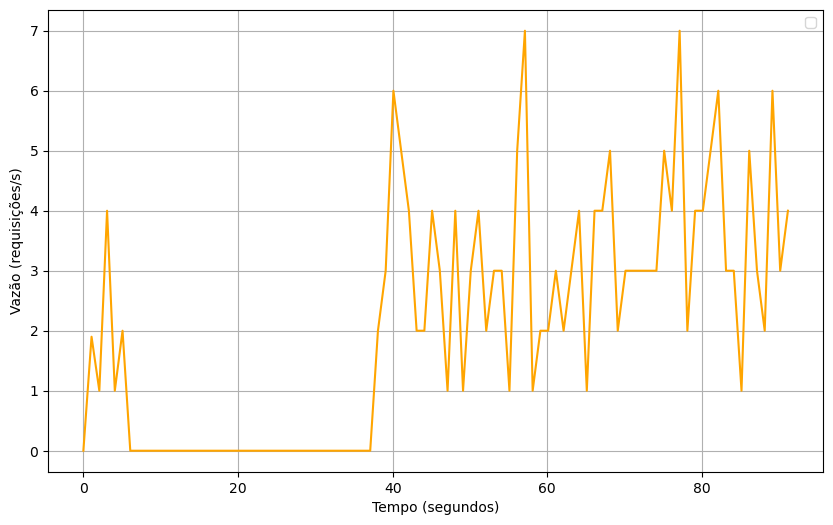

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_files(folder_path):
    latency_data = pd.DataFrame()
    throughput_data = pd.DataFrame()

    latency_file_path = os.path.join(folder_path, 'latency.csv')
    if os.path.exists(latency_file_path):
        latency_data = pd.read_csv(latency_file_path)
        if 'Timestamp' in latency_data.columns:
            latency_data['Timestamp'] = latency_data['Timestamp'].apply(nanoseconds_to_milliseconds)
            latency_data['Timestamp'] = latency_data['Timestamp'] - latency_data['Timestamp'].iloc[0]

    throughput_file_path = os.path.join(folder_path, 'throughput.csv')
    if os.path.exists(throughput_file_path):
        throughput_data = pd.read_csv(throughput_file_path)
        if 'Timestamp' in throughput_data.columns:
            throughput_data['Timestamp'] = throughput_data['Timestamp'].apply(nanoseconds_to_milliseconds)
            throughput_data['Timestamp'] = throughput_data['Timestamp'] - throughput_data['Timestamp'].iloc[0]

    return latency_data, throughput_data

def nanoseconds_to_milliseconds(nanoseconds):
    return nanoseconds / 10**9

def plot(folder,date):
    folder_path = os.path.join(os.getcwd(), folder,date)
    if os.path.exists(folder_path):
        latency_data, throughput_data = read_csv_files(folder_path)
        
        if not latency_data.empty:
            plt.figure(figsize=(10, 6))
            plt.plot(latency_data['Timestamp'], latency_data['Latency'])
            plt.xlabel('Tempo (segundos)')
            plt.ylabel('Latência (mseg)')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print(f"No latency data found in {folder}")

        if not throughput_data.empty:
            plt.figure(figsize=(10, 6))
            plt.plot(throughput_data['Timestamp'], throughput_data['Throughput'], color='orange')
            plt.xlabel('Tempo (segundos)')
            plt.ylabel('Vazão (requisições/s)')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print(f"No throughput data found in {folder}")
    else:
        print(f"Folder '{folder}' does not exist.")

plot('basic','set1')
